<a href="https://colab.research.google.com/github/sawible/AHHHHHHHHHHH/blob/main/Redshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import astropy.constants as ac
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [ ]:
dat = astropy.io.ascii.read("Tonry_2003.vot")

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity (km/s)')

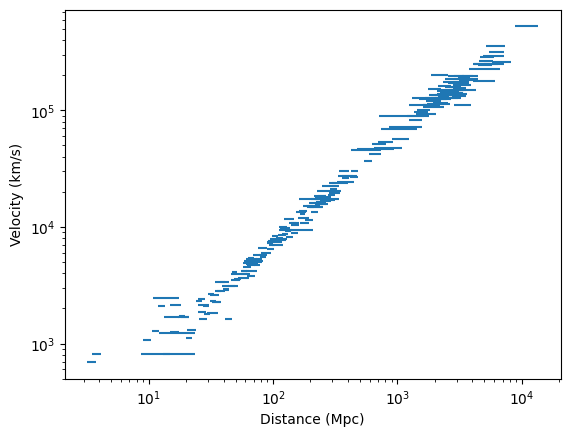

In [ ]:
distance = 10**dat["col8"] / 72 * u.mpc
distance_error = (10**(dat["col8"] + dat["col9"]) - 10**(dat["col8"])) / 72 * u.mpc
velocity = 10**dat["col7"] * u.km / u.s
velocity_error = 10**(dat["col7"]) * u.km / u.s
plt.errorbar(distance.to(u.mpc), velocity.to(u.km / u.s), xerr = distance_error.to(u.mpc), marker = ".", fmt = "None")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")

In [ ]:
l_distance = 10**dat["col8"] / 72.0
l_velocity = 10**dat["col7"]
z_linear = np.polyfit(l_distance,l_velocity,1)
C_linear = z_linear[0] * l_distance + z_linear[1]
print("Slope = ", z_linear[0])
print("Y-intercept = ", z_linear[1])


Slope =  48.46597819664574
Y-intercept =  6324.939132210128


In [ ]:
H0 = np.mean(l_velocity / l_distance)
print(H0)

67.7316752356907


Text(0, 0.5, 'Velocity (km/s)')

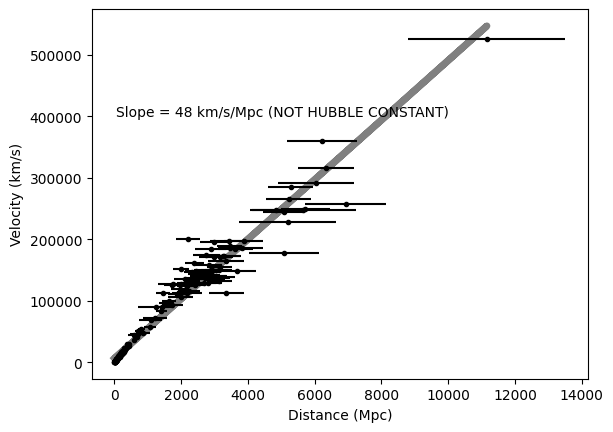

In [ ]:
plt.plot(distance.to(u.mpc), C_linear, color="gray", label="Linear fit", linewidth=5)

plt.errorbar(distance.to(u.mpc), velocity.to(u.km / u.s), xerr = distance_error.to(u.mpc), marker = ".", color="black", linestyle="none", label="Data")

plt.annotate("Slope = 48 km/s/Mpc (NOT HUBBLE CONSTANT)", xy = (50,400000))

plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")

In [ ]:
T = 1/(z_linear[0] * u.km / u.s / u.Mpc)
print(T.to(u.yr))

20174816604.618965 yr


In [ ]:
d = distance.to(u.mpc).value
v = velocity.to(u.km/u.s).value
ind = np.where((d > 0)& (d < 700))

z2_linear = np.polyfit(d[ind], v[ind], 1)

C2_linear = z2_linear[0] * l_distance + z2_linear[1]

print(C2_linear.value[ind])


[  590.13245468  1649.00267078  1474.30449417  1392.42304618
   613.38723392  1009.66178457  1854.42137097  9244.21894015
 12181.61814671  9409.4772195  13563.68599048  2693.28671609
 18337.80510592  1211.99421798  8480.77417248  4316.67430001
  1441.30352718  1602.20635718  2165.97001676 12127.28091875
  2889.51096038  8499.50544124 21776.82514008  7207.78688906
  4408.94773615 30894.01037854 17098.94864909  5963.81007122
 10537.67902266 14904.86150686 15981.37874541 12019.35428643
  5565.41375237 20671.86735258 26228.52491768 20255.17322498
 21097.28684007  6914.45766423 16308.58182313 15416.1663954
  4882.67607182 15520.56368359  8387.76206125 30475.00287177
 13263.02527024  1298.98748012  6765.1518592   8805.14646289
  4977.47804573 10034.71581774  1676.0931932   2203.8855685
  2567.58720116  3750.34048166 16755.53513623 13902.50782797
 19712.84505818  5899.60940982  2349.82932283  4522.51735308
  9493.25495665 39516.03651712  7319.13166368  2084.47417108
  2640.06649266 39516.0365

Text(0, 0.5, 'Velocity (km/s)')

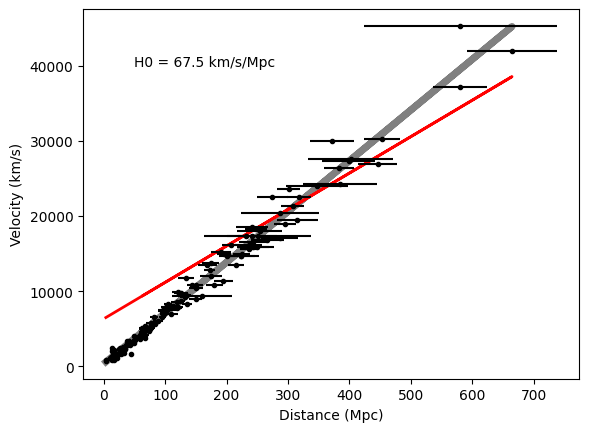

In [ ]:
plt.plot(d[ind], C2_linear.value[ind], color="gray", label="Linear fit", linewidth=5)

plt.plot(distance.to(u.mpc).value[ind], C_linear.value[ind], color="red", label="Linear fit", linewidth=2)


plt.errorbar(d[ind], v[ind], xerr = distance_error.to(u.mpc).value[ind], marker = ".", color="black", linestyle="none", label="Data")

plt.annotate("H0 = 67.5 km/s/Mpc", xy = (50,40000))

plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")